### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset (1).png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [ ]:
your name = "Sparsh Dubey"
your student_id = 48057053

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
# your code and solutions
import pandas as pd
x = pd.read_csv('The E-commerce Dataset.csv')
x.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [4]:
null_counts = x.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [6]:
print("\nLength of the data before removing missing values:", len(x))


Length of the data before removing missing values: 20000


In [7]:
x_cleaned = x.dropna()

In [8]:
print("\nLength of the data after removing missing values:", len(x_cleaned))


Length of the data after removing missing values: 19934


In [9]:
x_cleaned.shape

(19934, 11)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [15]:
# your code and solutions
unique_users = x_cleaned['userId'].nunique()
unique_reviews = x_cleaned['review'].nunique()
unique_items = x_cleaned['item'].nunique()
unique_categories = x_cleaned['category'].nunique()
print("Q2.1:")
print("Total number of unique users:", unique_users)
print("Total number of unique reviews:", unique_reviews)
print("Total number of unique items:", unique_items)
print("Total number of unique categories:", unique_categories)

Q2.1:
Total number of unique users: 8565
Total number of unique reviews: 19460
Total number of unique items: 89
Total number of unique categories: 9


In [16]:
rating_stats = x_cleaned['rating'].describe()
print("\nQ2.2:")
print("Descriptive statistics for all rating records:")
print(rating_stats)


Q2.2:
Descriptive statistics for all rating records:
count    19934.000000
mean         3.701415
std          1.404546
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [12]:
gender_item_stats = x_cleaned.groupby('gender')['item_id'].describe()
print("\nQ2.3:")
print("Descriptive statistics for the number of items rated by different genders:")
print(gender_item_stats)


Q2.3:
Descriptive statistics for the number of items rated by different genders:
          count       mean        std  min   25%   50%   75%   max
gender                                                            
F        9799.0  41.443004  27.269833  0.0  17.0  41.0  65.0  88.0
M       10135.0  42.103799  27.281903  0.0  18.0  41.0  66.0  88.0


In [13]:
item_rating_stats = x_cleaned.groupby('item_id')['rating'].describe()
print("\nQ2.4:")
print("Descriptive statistics for the number of ratings received by each item:")
print(item_rating_stats)


Q2.4:
Descriptive statistics for the number of ratings received by each item:
         count      mean       std  min   25%  50%  75%  max
item_id                                                     
0        941.0  2.497343  1.368818  1.0  1.00  2.0  4.0  5.0
1        657.0  3.412481  1.541706  1.0  2.00  4.0  5.0  5.0
2        157.0  3.541401  1.263341  1.0  3.00  4.0  4.0  5.0
3        240.0  3.683333  1.571095  1.0  2.00  4.0  5.0  5.0
4        185.0  3.054054  1.417015  1.0  2.00  3.0  4.0  5.0
...        ...       ...       ...  ...   ...  ...  ...  ...
84       210.0  3.971429  1.093322  1.0  3.25  4.0  5.0  5.0
85       161.0  3.447205  1.198440  1.0  3.00  3.0  4.0  5.0
86       245.0  4.118367  0.853074  1.0  4.00  4.0  5.0  5.0
87       173.0  4.023121  1.474409  1.0  3.00  5.0  5.0  5.0
88       596.0  4.333893  0.949618  1.0  4.00  5.0  5.0  5.0

[89 rows x 8 columns]


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [14]:
# your code and solutions
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


C:\Users\acerv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


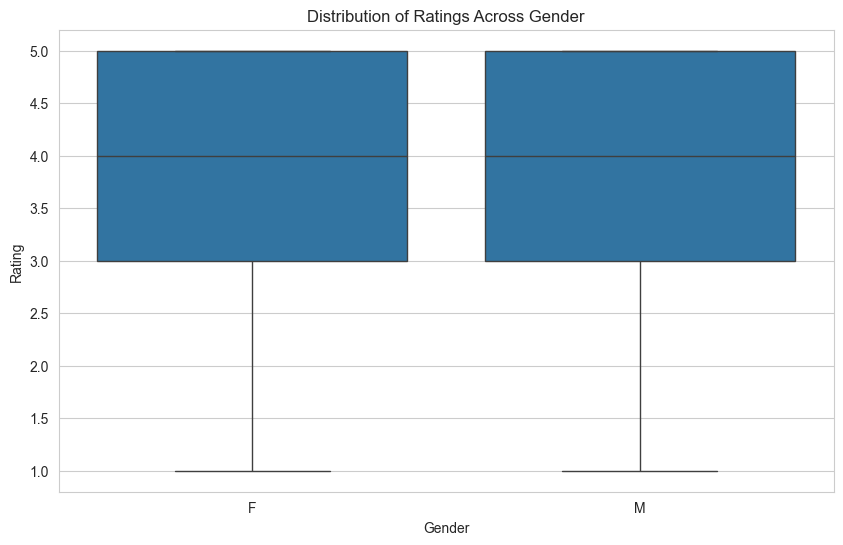

In [17]:
# Create a box plot comparing ratings across gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='rating', data=x_cleaned)
plt.title('Distribution of Ratings Across Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

C:\Users\acerv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


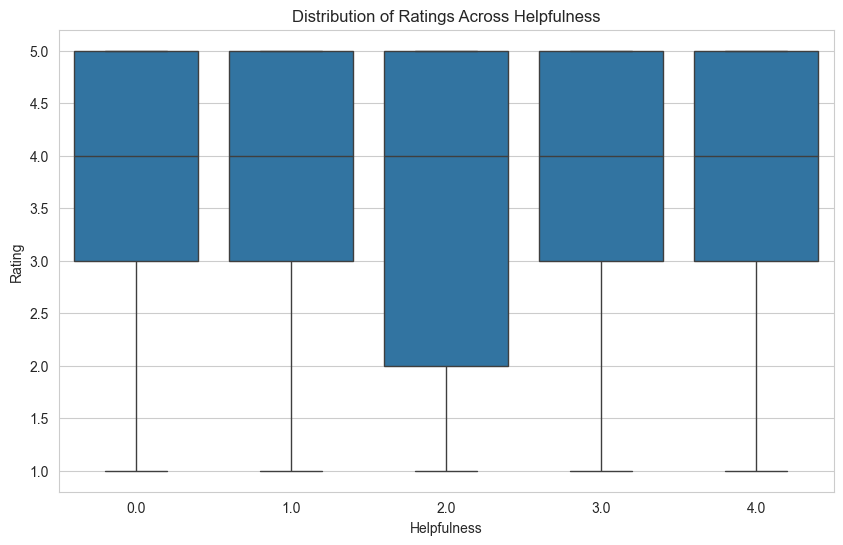

In [18]:
# Create a box plot comparing ratings across helpfulness
plt.figure(figsize=(10, 6))
sns.boxplot(x='helpfulness', y='rating', data=x_cleaned)
plt.title('Distribution of Ratings Across Helpfulness')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')
plt.show()

C:\Users\acerv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


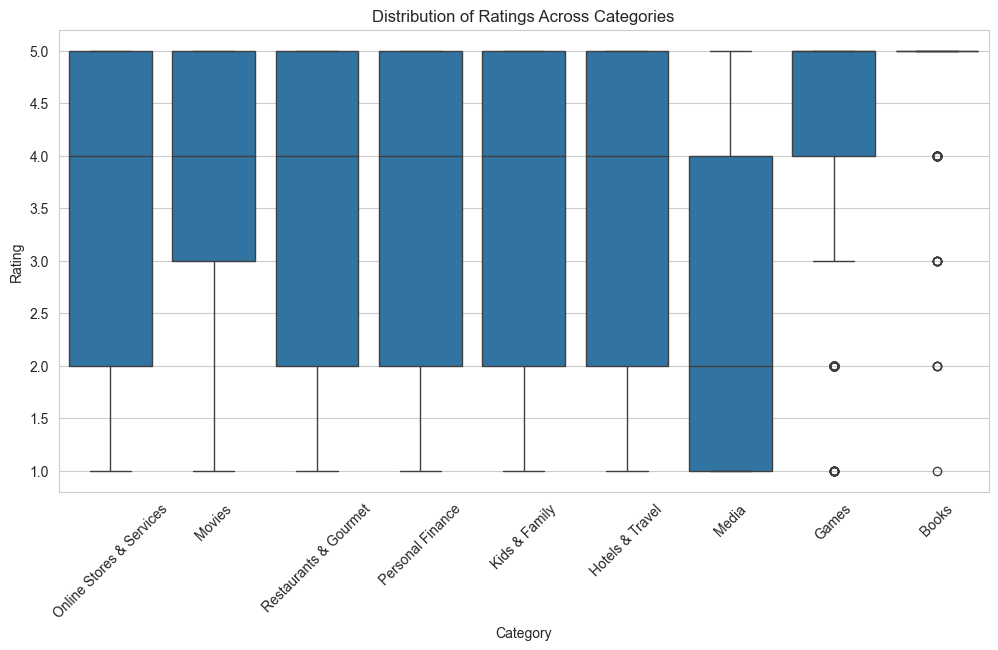

In [19]:
# Create a box plot comparing ratings across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='rating', data=x_cleaned)
plt.title('Distribution of Ratings Across Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [17]:
# your code and solutions
#Remove reviews with helpfulness no more than 2
x_cleaned = x_cleaned[x_cleaned['helpfulness'] > 2]

In [18]:
#Remove users who rate less than 7 items
user_counts = x_cleaned['userId'].value_counts()
outlier_users = user_counts[user_counts < 7].index
x_cleaned = x_cleaned[~x_cleaned['userId'].isin(outlier_users)]

In [19]:
#Remove items that receive less than 11 ratings
item_counts = x_cleaned['item_id'].value_counts()
outlier_items = item_counts[item_counts < 11].index
x_cleaned = x_cleaned[~x_cleaned['item_id'].isin(outlier_items)]

In [20]:
print("Length of the data after removing outliers:", len(x_cleaned))

Length of the data after removing outliers: 2696


In [ ]:
Summary:-
    
I understood the concept of many concepts like plotting of a data, analyzing a data and also removing of a data.
In the first question, I removed the missing data and then I described it like how I did that.
In the second question, I understood the concept of mean, standard deviation and minimum and maximum value of a data.
In the third question, I understood how to plot, import and analyze a data.
And lastly In the last question, I understood how to detect and remove outliers.